# Predicting usage of video game project

Background: 
This is a data analysis project for the study of video game servers. The research team from the Department of Computer Science at UBC collected data on how people play video games. This project will analyze the collected data to ensure that the MineCraft server they establish has a clear recruitment target and attracts players.

In this project, I will conduct an analysis based on specific issues. In particular, we want to know which players will actively participate in subscribing to the new information of the game and provide a large amount of data for us to identify the target recruitment group.

We have two pieces of data. The first one is called "players", which is the data table of all players. Some of the variables include the basic information of the players, how much gaming experience they have, whether they subscribe, the players' email addresses and the playing time.The second one is about the game session data of each player, recording the start and end game times of each player.

Firstly, let's load the players data list into notebook to see what we get. I'll assign the data to players.

In [3]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)
library(lubridate)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [4]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


This data includes some important variables:
experience: The gaming experience of players.
subscribe: If the players subscribe any video game channel. 
played_hours: The duration of the game played by the player
gender: Players' gender.
Age: Players" age.

In order for furthur analysis, I'll handle this data simply first.

I will first screen out those who have not subscribed to the game channel and have very little time to play games. This kind of people are very likely not to subscribe to any new information about the games and participate in them.

In [5]:
players_new <- players |> 
               filter(subscribe == "TRUE" & played_hours >= 1) #filter out the players that we are not interested in
players_new

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,22a78bfd44e46931261d06864b92cf9a8fd77fb02bec66cb71646dd9da222a0d,1.2,Aaron,Non-binary,17
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22


We also want to know if there's any relationship between player age and game duration. To know this, we can create a scatter plot. 

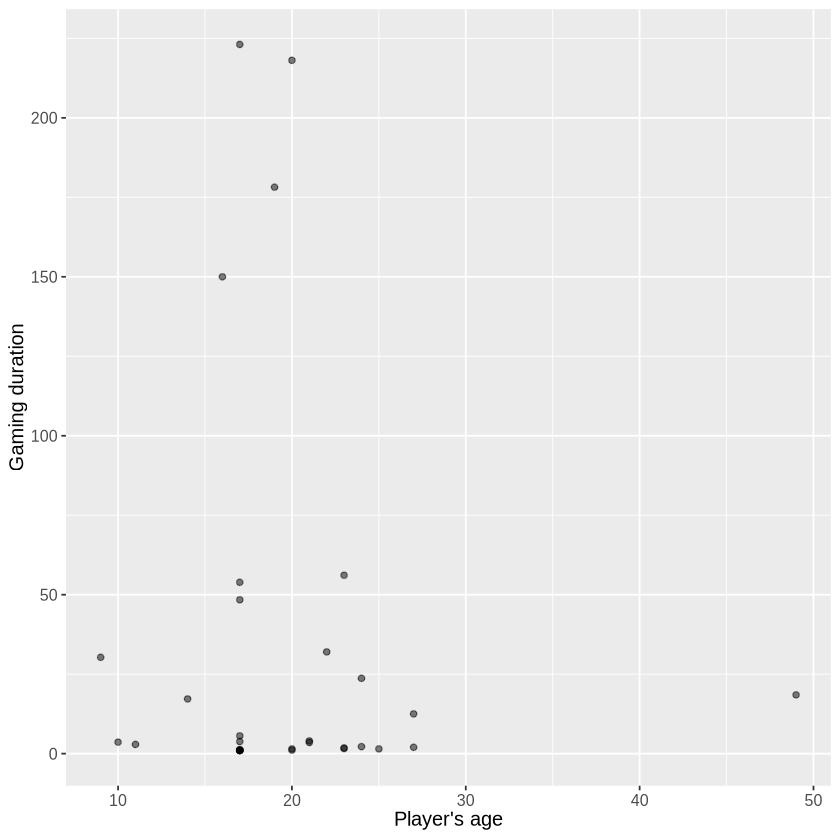

In [6]:
plot_1 <- players_new |>
          ggplot(aes(x = Age, y = played_hours)) + 
          geom_point(alpha = 0.5) + 
          labs(x = "Player's age", y = "Gaming duration") + 
          theme(text = element_text(size = 12))

plot_1

There's no linear relationship between Age and game duration, but we can see that most players are under 30. And people in 15 - 25 spend more time on video games. 

Besides, we are also curious what gender usually play more games. 

In [7]:
count_genders <- players_new |>
                group_by(gender) |>
                summarize(count = n())
count_genders

gender,count
<chr>,<int>
Agender,1
Female,8
Male,20
Non-binary,3
Prefer not to say,1


It can be seen from this that most of the data were provided by males. 

Next, we redraw plot_1, but display different genders with colors.

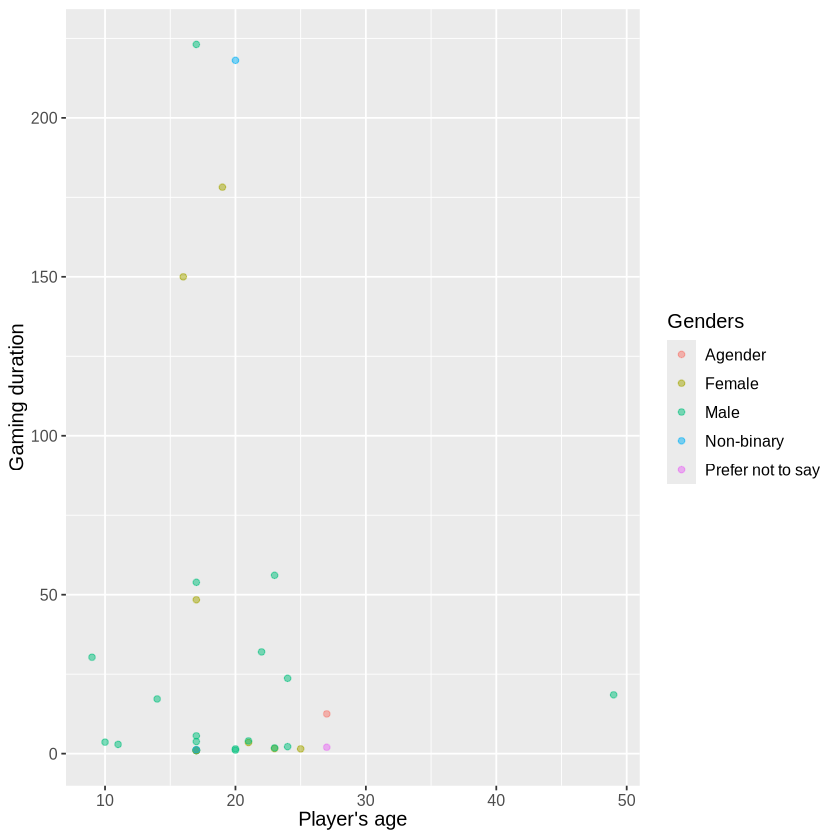

In [8]:
plot_1_new <- players_new |>
          ggplot(aes(x = Age, y = played_hours,color = gender)) + 
          geom_point(alpha = 0.5) + 
          labs(x = "Player's age", y = "Gaming duration",color = "Genders") + 
          theme(text = element_text(size = 12))

plot_1_new

There is no doubt that men usually play games for a longer time.

Additionally, we can combine expericen and gender to see if males always have more expericen in games.

In [9]:
exp_in_gender <- players_new |>
                 group_by(experience,gender) |>
                 summarize(count = n())
exp_in_gender

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,gender,count
<chr>,<chr>,<int>
Amateur,Female,3
Amateur,Male,6
Amateur,Non-binary,1
⋮,⋮,⋮
Veteran,Female,1
Veteran,Male,2
Veteran,Non-binary,1


There are not many veteran, so the number of veterans in different genders is almost the same, with a slightly higher number in men.

Now, it's time to gather the other data for further analysis. 

In [10]:
sessions_data <- read_csv("sessions.csv") |> clean_names()

sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


This data is a list of individual play sessions by each player.The variables provide player's email, and their time duration of playing video games. 

In order to know how long each player spend on games, we can create a new column called duration to express it. But we need to convert both start_time and end_time into a calculable format in the first step.


In [11]:
sessions_data <- sessions_data |> mutate(start_time = dmy_hm(start_time)) |>
                                      mutate(end_time = dmy_hm(end_time))
sessions_data

hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12


Thus, we can calculate the time duration of each player! It seems that we don't relly need the original_start_time and original_end_time columns, so I'll subtract these two columns from the data. 

In [14]:
sessions_duration <- sessions_data |> select(hashed_email:end_time) |>
                                     mutate(duration = end_time - start_time)
sessions_duration

hashed_email,start_time,end_time,duration
<chr>,<dttm>,<dttm>,<drtn>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,12 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,13 mins
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,23 mins
⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,21 mins
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,7 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,19 mins


Here we have a new column called duration, which displays the time each player spend on game. 

Notice that we don't have players' other information in sessions data. So we need to get more information from players data by the hashed_email given in sessions data. 

In [15]:
merged_data <- merge(sessions_duration,players_new, by.x = "hashed_email", by.y = "hashedEmail")
merged_data


hashed_email,start_time,end_time,duration,experience,subscribe,played_hours,name,gender,Age
<chr>,<dttm>,<dttm>,<drtn>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2024-05-22 23:12:00,2024-05-23 00:13:00,61 mins,Regular,TRUE,1.5,Isaac,Male,20
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2024-05-23 00:22:00,2024-05-23 01:07:00,45 mins,Regular,TRUE,1.5,Isaac,Male,20
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,2024-08-29 04:08:00,2024-08-29 04:52:00,44 mins,Regular,TRUE,5.6,Winslow,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-14 05:19:00,2024-07-14 06:13:00,54 mins,Amateur,TRUE,56.1,Dana,Male,23
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-30 03:44:00,2024-07-30 03:54:00,10 mins,Amateur,TRUE,56.1,Dana,Male,23
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,2024-04-26 09:11:00,2024-04-26 10:23:00,72 mins,Beginner,TRUE,1.1,Caden,Male,20


Right now we have information for each players. We can create a scatter plot to see if there's any relationship between age and time duration. 

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


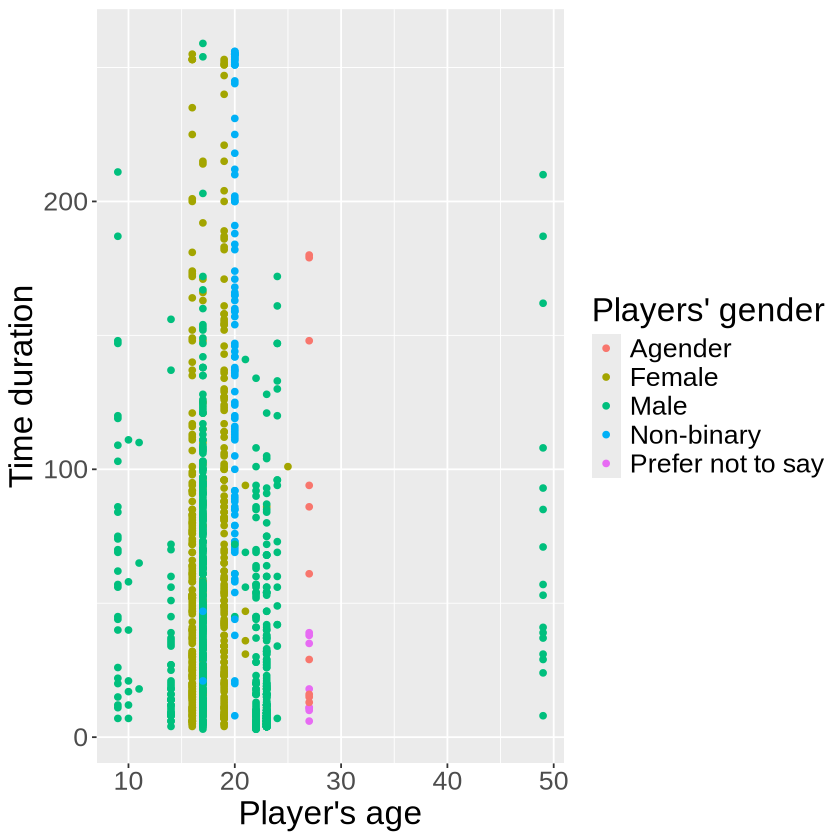

In [16]:

age_vs_duration <- merged_data |> 
                   ggplot(aes(x = Age, y = duration, color = gender)) + 
                   geom_point() +
                   labs(x = "Player's age" , y = "Time duration", color = "Players' gender") + 
                   theme(text = element_text(size = 20))
age_vs_duration

We get the same conclusion as before, most players are between 15-30, and males always spend more time on gaming. For further analysis,  we can calulate the mean time spending on games for both male and female. 

In [17]:
mean_duration <- merged_data |> group_by(gender) |> summarize(mean = mean(duration))
mean_duration

gender,mean
<chr>,<drtn>
Agender,82.10000 mins
Female,72.22034 mins
Male,38.48123 mins
Non-binary,NA mins
Prefer not to say,21.00000 mins


# summary

After analyzing the two existing data, we can answer the question raised initially. By analyzing player data, it can be known that players aged approximately between fifteen and thirty usually subscribe to game channels and play for a relatively long time. Among this group of players, the proportion of men is the highest.
This result is not unexpected; it is even expected. Usually, men prefer to play games, which means that a large proportion of our target recruits will be men. They are more likely to actively follow game information and subscribe to game channels. But surprisingly, through the analysis of the sessions data, we learned that genderless people played games for the longest time. The second is women, while the duration of men can only rank third.This means that although the majority of our target group is male, genderless individuals and women among the participants actually provided a considerable amount of data.This means that although the majority of our target group is male, genderless individuals and women among the participants actually provided a considerable amount of data.